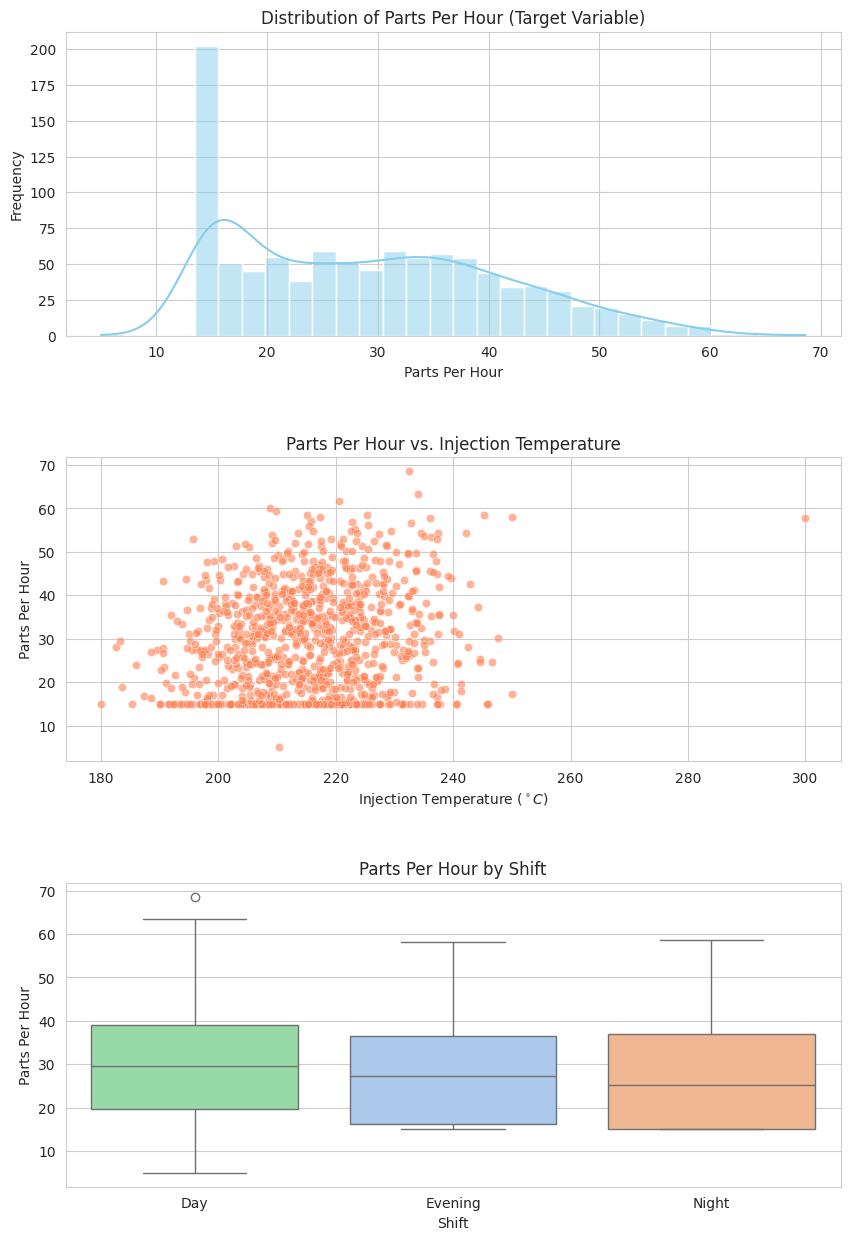


--- Model Evaluation (Linear Regression) ---
Mean Squared Error (MSE): 12.2820
Root Mean Squared Error (RMSE): 3.5046
R-squared (R^2): 0.9059

--- Top 5 Feature Coefficients (Absolute Value) ---
| Feature                    | Coefficient   |
|:---------------------------|:--------------|
| num__Total_Cycle_Time      | -10.0477      |
| num__Efficiency_Score      | 2.94594       |
| num__Cooling_Time          | 2.6664        |
| num__Injection_Temperature | 2.2924        |
| num__Machine_Age           | -2.22931      |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Data Loading ---
file_path = "manufacturing_dataset_1000_samples (1).csv"
df = pd.read_csv(file_path)

# --- 2. Exploratory Data Analysis (EDA) & Visualizations ---

# Set up figure style
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)

# Plot 1: Target Variable Distribution (Parts_Per_Hour)
sns.histplot(df['Parts_Per_Hour'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Distribution of Parts Per Hour (Target Variable)')
axes[0].set_xlabel('Parts Per Hour')
axes[0].set_ylabel('Frequency')

# Plot 2: Relationship with Injection_Temperature
sns.scatterplot(x='Injection_Temperature', y='Parts_Per_Hour', data=df, ax=axes[1], color='coral', alpha=0.6)
axes[1].set_title('Parts Per Hour vs. Injection Temperature')
axes[1].set_xlabel('Injection Temperature ($^\circ C$)')
axes[1].set_ylabel('Parts Per Hour')

# Plot 3: Relationship with Shift (Categorical)
shift_order = df.groupby('Shift')['Parts_Per_Hour'].median().sort_values(ascending=False).index
# Corrected for future seaborn compatibility and display
sns.boxplot(x='Shift', y='Parts_Per_Hour', data=df, ax=axes[2], hue='Shift', palette='pastel', order=shift_order, legend=False)
axes[2].set_title('Parts Per Hour by Shift')
axes[2].set_xlabel('Shift')
axes[2].set_ylabel('Parts Per Hour')

# Display the plot
plt.show() 

# --- 3. Data Preprocessing ---

# Define target and features
X = df.drop('Parts_Per_Hour', axis=1)
y = df['Parts_Per_Hour']

# Separate features by type for transformation
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

# Create Preprocessing Pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # FIX: Handles missing values (NaNs)
    ('scaler', StandardScaler())                 # Scales numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drops columns like 'Timestamp'
)

# --- 4. Model Training and Evaluation ---

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a final pipeline that chains the preprocessor and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) 
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation (Linear Regression) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

# Print out the Linear Regression coefficients (for interpretability)
linear_reg_model = model.named_steps['regressor']
feature_names_out = model.named_steps['preprocessor'].get_feature_names_out()

coefficients_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Coefficient': linear_reg_model.coef_
})

# Display top 5 coefficients (absolute value) for insight
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

print("\n--- Top 5 Feature Coefficients (Absolute Value) ---")
print(coefficients_df.head(5).to_markdown(index=False, numalign="left", stralign="left"))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0506547-c405-4ab3-8f25-a6909658328e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>